In [1]:
import joblib

# Logistic Regression

In [2]:
log_reg_first_ver = joblib.load("Models/log_reg_under_sample.pkl") 

In [3]:
import numpy as np

X_train = np.genfromtxt("Data/X_train_under.csv", delimiter=',')
y_train = np.genfromtxt("Data/y_train_under.csv", delimiter=',')

In [4]:
from sklearn.model_selection import cross_val_score

In [5]:
cross_val_score(log_reg_first_ver, X_train, y_train, cv=3, scoring="f1")

array([0.75854922, 0.74136126, 0.76273803])

In [6]:
from sklearn.model_selection import cross_val_predict

In [7]:
y_train_pred = cross_val_predict(log_reg_first_ver, X_train, y_train, cv=3)

In [8]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

In [9]:
confusion_matrix(y_train, y_train_pred)

array([[2188,  707],
       [ 714, 2181]], dtype=int64)

In [10]:
precision_score(y_train, y_train_pred)

0.7551939058171745

In [11]:
recall_score(y_train, y_train_pred)

0.7533678756476684

In [12]:
from sklearn.metrics import f1_score

In [13]:
f1_score(y_train, y_train_pred)

0.7542797855784195

In [14]:
from sklearn.metrics import precision_recall_curve

In [15]:
y_scores = cross_val_predict(log_reg_first_ver, X_train, y_train, cv=3, method="predict_proba")

In [16]:
y_scores

array([[0.27686702, 0.72313298],
       [0.6799927 , 0.3200073 ],
       [0.71326513, 0.28673487],
       ...,
       [0.43071501, 0.56928499],
       [0.71697879, 0.28302121],
       [0.08326959, 0.91673041]])

In [17]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores[:, 1])

In [18]:
f1 = (2 * precisions * recalls)/(precisions + recalls)

In [19]:
import matplotlib.pyplot as plt

In [20]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds, f1):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.plot(thresholds, f1[:-1], "r--", label="F1")

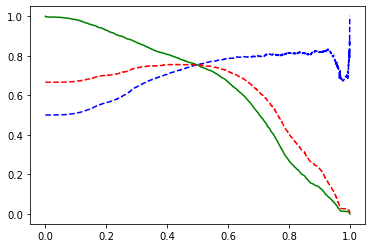

In [21]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds, f1)

In [22]:
THRESHOLD = thresholds[np.argmax(precisions == recalls)]
THRESHOLD

0.497815912468949

In [23]:
preds = np.where(log_reg_first_ver.predict_proba(X_train)[:,1] > THRESHOLD, 1, 0)

In [24]:
import pandas as pd

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
pd.DataFrame(data=[accuracy_score(y_train, preds),
                   recall_score(y_train, preds),
                   precision_score(y_train, preds),
                   f1_score(y_train, preds)], 
             index=["accuracy", "recall", "precision", "f1_score"])

,0
accuracy,0.770294
recall,0.762349
precision,0.774658
f1_score,0.768454


### Test set

In [27]:
X_test = np.genfromtxt("Data/X_test.csv", delimiter=',')
y_test = np.genfromtxt("Data/y_test.csv", delimiter=',')

In [28]:
y_test_pred = np.where(log_reg_first_ver.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

In [29]:
pd.DataFrame(data=[accuracy_score(y_test, y_test_pred),
                   recall_score(y_test, y_test_pred),
                   precision_score(y_test, y_test_pred),
                   f1_score(y_test, y_test_pred)], 
             index=["accuracy", "recall", "precision", "f1_score"])

,0
accuracy,0.756002
recall,0.744748
precision,0.506067
f1_score,0.602635


In [30]:
confusion_matrix(y_test, y_test_pred)

array([[2188,  692],
       [ 243,  709]], dtype=int64)

In [31]:
log_reg_first_ver.n_iter_

array([29])

In [32]:
np.max(np.abs(log_reg_first_ver.coef_))

0.4253292641850601